# ML Практическая работа 1
## Мурадян Денис

### Анализ и редактирование данных (EDA)

## Задание

1. Написать теоретическую справку в ноутбуке – цель задачи, описать признаки датасета, написать задачи на эту работу.
Ваша цель работы – первичный анализ данных.
Задачи: то, как Вы будете обрабатывать данные (см. ноутбук 1 + практическую презентацию).
2. Найти датасет из открытых источников с пропусками, выбросами, неправильными типами данных (можно найти на kaggle). При выборе датасета важно: в нем должны быть как количественные признаки, так и качественные (=категориальные). Датасеты у всех должны быть индивидуальными – ссылкой Вы должны его привязать к своей фамилии в виде комментария в таблице, с этим датасетом Вы будете работать весь семестр.
3. Обработать пропуски (с помощью статистических метрик).
4. Обработать выбросы.
5. Обработать неправильный тип данных.
6. Преобразовать качественные признаки.
7. Поделить выборку на тренеровочную, тестовую и валидационную
8. Сделать стандартизацию данных (см. презентацию).
9. Сделать визуализацию (графики, матрицы).
10. Использовать различные методы описания данных (describe, info, head и тд) – тут указаны примеры, нужно использовать минимум 8 методов для датасетов.

### Описание датасета

Источник: [Used Cars Dataset on Kaggle](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)  
Название: **Craigslist Car and Truck Data**  
Количество записей: 426.8k  
Количество признаков: 26  

Датасет содержит объявления о продаже подержанных автомобилей с сайта Craigslist по всем штатам США. Данные были собраны в рамках исследовательского проекта и включают в себя широкий спектр информации: от технических характеристик до геолокации и описания состояния авто.

Целью работы: **исследование и первичная обработка данных**

### Признаки датасета

#### Количественные признаки:
- `id` — уникальный идентификатор объявления
- `price` — цена автомобиля (в долларах), целевая переменная для регрессии
- `year` — год выпуска автомобиля
- `cylinders` — количество цилиндров в двигателе
- `odometer` — пробег автомобиля в милях
- `lat` — широта места размещения объявления
- `long` — долгота места размещения объявления

#### Качественные признаки:
- `url` — ссылка на объявление
- `region` — регион Craigslist ("austin", "boston", "florida")
- `region_url` — URL региона
- `manufacturer` — производитель автомобиля (Toyota, Ford, BMW и т.д.)
- `model` — модель автомобиля
- `condition` — состояние авто: от "salvage" до "new"
- `fuel` — тип топлива: gas, diesel, electric и др.
- `title_status` — юридический статус: clean, salvage, rebuilt и др.
- `transmission` — тип коробки передач: automatic, manual
- `VIN` — винкод номер
- `drive` — тип привода: 4wd, fwd, rwd, awd, 2wd
- `size` — размер авто: compact, mid-size, full-size
- `type` — тип кузова: sedan, SUV, truck, coupe и др.
- `paint_color` — цвет кузова
- `image_url` — ссылка на изображение
- `description` — текстовое описание автомобиля
- `county` — округ
- `state` — штат США
- `posting_date` — дата публикации объявления

### Цель задачи

**Задачи:**
1. Провести первичное исследование данных
2. Обработать пропущенные значения с использованием логически обоснованных подходов (включая иерархическое заполнение).
3. Устранить выбросы в числовых признаках на основе экспертных границ.
4. Преобразовать неправильные типы данных
5. Закодировать категориальные признаки
6. Разделить выборку на тренировочную, валидационную и тестовую части.
7. Выполнить стандартизацию числовых признаков.
8. Построить визуализации для анализа распределений и взаимосвязей между признаками.
9. Проанализировать корреляции между числовыми признаками.
10. Сформулировать выводы по каждому этапу и общий итоговый вывод.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/craigslist-carstrucks-data


Теперь загрузим датасет с помощью `pd.read_csv`. Далее выведем первые 5 строк датасета, используя `df.head()`.  

In [2]:
import pandas as pd

df = pd.read_csv(f"{path}/vehicles.csv")
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


*Примечание:* мы увидели предупреждение

> `RuntimeWarning: invalid value encountered in greater/less` 
> (модуль `pandas.io.formats.format`)

которое возникает на этапе *форматирования вывода* таблицы.  
`pandas` при печати проверяет, нет ли слишком больших или маленьких чисел, чтобы решить — показывать их в обычном или экспоненциальном формате.  
А мы можем заметить, что первых 5 строках, которые мы вывели, есть `NaN`, при сравнении с ними возникает предупреждение.
Ничего страшного и критичного это предупреждение не несет, просто теперь мы знаем о наличии `пустых` значений в ячейках.

## Анализ
Узнаем размерность датасета, какие столбцы у нас есть - их названия и сколько у нас полных дубликатов строк, если они есть - о удалим их

In [3]:
print(f"\nРазмерность датасета: {df.shape}")
print(f"\nИмена столбцов: {df.columns.tolist()}")
print(f"\nКоличество полных дубликатов строк: {df.duplicated().sum()}")
df= df.drop_duplicates()
print(f"\nКоличество полных дубликатов строк после удаления: {df.duplicated().sum()}")


Размерность датасета: (426880, 26)

Имена столбцов: ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']

Количество полных дубликатов строк: 0

Количество полных дубликатов строк после удаления: 0


Посмотрим общую информацию о датасете `info()`, типе данных в признаках и количество ненулевых значений

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Видим, что `cylinders` — это строки "6 cylinders", но логичнее было бы хранить это признак целочисленно, достанем цифру с помощью регулярного выражения и переведём в целочисленный формат (`Int64`)

Еще у нас есть `posting_date` — дата публикации объявления. Сейчас она в формате строки с временной зоной, но нам не нужна такая детализация. Нам интересен сам факт, *когда* было размещено объявление, а не точное время и часовой пояс. Поэтому переведём этот столбец в стандартный формат даты `YYYY-MM-DD`.

Также удалим несколько столбцов, которые либо не несут полезной информации, либо будут мешать в моделировании:
- `url`, `region_url`, `image_url` — это ссылки, уникальные для каждой записи, их не используем как признаки
- `VIN` — идентификатор автомобиля, тоже уникальный, не влияет на цену
- `county` — видим, что все значения пустые - удалим этот признак
- `lat` и `long` - избыточные данные, нам достаточно знать штат публикации

In [5]:
# Удаляем ненужные столбцы (ссылки/вин код и тд)
drop_cols = ["url", "region_url", "image_url", "VIN", "county", 'lat', 'long']
df = df.drop(columns=drop_cols)

# cylindersизвлечь число, оставить как целое (Int64)
df["cylinders"] = (
    df["cylinders"]
    .str.extract(r"(\d+)", expand=False)
    .astype("Int64")
)

# posting_date 'YYYY-MM-DD'
df["posting_date"] = (
    pd.to_datetime(df["posting_date"], errors="coerce", utc=True).dt.tz_localize(None))

# Посмотрим, что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   region        426880 non-null  object        
 2   price         426880 non-null  int64         
 3   year          425675 non-null  float64       
 4   manufacturer  409234 non-null  object        
 5   model         421603 non-null  object        
 6   condition     252776 non-null  object        
 7   cylinders     247904 non-null  Int64         
 8   fuel          423867 non-null  object        
 9   odometer      422480 non-null  float64       
 10  title_status  418638 non-null  object        
 11  transmission  424324 non-null  object        
 12  drive         296313 non-null  object        
 13  size          120519 non-null  object        
 14  type          334022 non-null  object        
 15  paint_color   296

## Перейдем к работе с пропусками

In [6]:
print("Количество пропусков в каждом столбце:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Количество пропусков в каждом столбце:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
description         70
posting_date        68
dtype: int64


In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(f"Процент пропусков по столбцам: \n{missing_percentage.sort_values(ascending=False)}")

Процент пропусков по столбцам: 
size            71.767476
cylinders       41.926537
condition       40.785232
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
description      0.016398
posting_date     0.015930
region           0.000000
price            0.000000
state            0.000000
id               0.000000
dtype: float64


Как мы видим, в датасете довольно много пропущенных значений, особенно в таких важных признаках, как:

- `cylinders` — почти 179 тыс. пропусков
- `size`, `paint_color`, `drive` — десятки тысяч
- `condition`, `manufacturer`, `model` — тоже немало

Однако удалять все строки с пропусками целиком — не лучшая идея, ведь мы теряем слишком много данных. Вместо этого постараемся **восстановим часть пропусков логически** или все-таки удалим данные - где пропуски в ключевых признаках, от которых много что зависит, чтобы не зашумлять данные.

Начнём с самого очевидного: если у нас есть `model`, но нет `manufacturer`, это поправимо. Например, если модель — "f-150", то ясно, что это Ford. Мы можем создать отображение: для каждой модели найти самую частую марку и заполнить `manufacturer` на основе этой связи. Это логично и сохраняет структуру данных.

А вот если `model` — `NaN`, то восстановить его по `manufacturer` уже невозможно: у одной марки может быть десятки моделей. Поэтому **строки с пропуском в `model` мы удаляем** — без модели автомобиль неидентифицируем, и дальнейшее использование такой записи будет шумом.

В `size` — у нас аж **71.77% пропусков**. Это слишком много, чтобы пытаться заполнить эти значения на основе оставшихся 28% записей — выборка будет слишком мала и нерепрезентативна. Поэтому **мы удалим этот признак** из дальнейшего анализа. Он не критичен, так как тип кузова (`type`) и размер можно косвенно определить по другим признакам.

С `condition` поступим умнее. Состояние автомобиля напрямую связано с его моделью, годом выпуска и пробегом. Например, у Toyota Camry 2015 года с пробегом 50 тыс. миль состояние скорее всего "хорошее", а не "новое". Поэтому **заполним пропуски в `condition` модой по группе `model` + `year` + `odometer`** — это даст нам максимально точное восстановление.

Для `cylinders` используем  **иерархическое заполнение**. Сначала попробуем определить количество цилиндров по `model` и `year` (например, Ford F-150 2015 года обычно имеет 6 цилиндров), если таких записей нет — по `manufacturer` и `year`, если и там нет — просто по `manufacturer`, а если совсем ничего — общей модой по всему датасету. Такой подход учитывает логику автомобильного рынка.

С `odometer` поступим аналогично: **найдем средний пробег для автомобилей с похожей моделью, годом выпуска и ценой**. Например, если у нас есть Toyota Camry 2015 года за $15 000, то средний пробег для таких авто — около 70 тыс. миль. Это даст нам более точное восстановление, чем просто медиана по всему датасету.

Что касается `paint_color` и `transmission` — пропусков там меньше 1%, поэтому мы просто **удалим эти строки**. Это незначительно повлияет на объем данных, но избавит нас от необходимости придумывать сложные методы заполнения для малозначимых признаков.

Также удалим строки с пропусками в `drive` и `type`, так как эти признаки важны для анализа (привод и тип кузова напрямую влияют на цену), а заполнить их логично без дополнительной информации невозможно.

Вот такой план действий:
1. Удалим строки с пропусками в `model`
2. Удаляем признак `size` (слишком много пропусков)
3. Восстанавливаем `manufacturer` по `model`
5. Заполняем `cylinders` иерархически (model+year → manufacturer+year → manufacturer → общая мода)
6. Заполняем `condition` модой по model+year+odometer
7. Заполняем `odometer` средним по model+year+price
8. Удаляем строки с пропусками в paint_color, transmission, drive, type

In [8]:
df = df.dropna(subset=['model']).reset_index(drop=True)

# Удаляем признак size (слишком много пропусков)
df = df.drop(columns=['size'])

# Восстанавливаем manufacturer по model
model_to_manufacturer = df.groupby('model')['manufacturer'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).to_dict()
mask = df['manufacturer'].isna()
df.loc[mask, 'manufacturer'] = df.loc[mask, 'model'].map(model_to_manufacturer)
df = df.dropna(subset=['manufacturer']).reset_index(drop=True)



def safe_mode(series):
    modes = series.mode()
    return modes.iloc[0] if len(modes) > 0 else None

# Заполняем cylinders по model + year
print("Заполняем cylinders по model + year...")
mask = df['cylinders'].isna()
temp = df.groupby(['model', 'year'], observed=False)['cylinders'].transform(safe_mode)
df.loc[mask, 'cylinders'] = df.loc[mask, 'cylinders'].fillna(temp)

# Заполняем cylinders по manufacturer + year
print("Заполняем cylinders по manufacturer + year...")
mask = df['cylinders'].isna()
temp = df.groupby(['manufacturer', 'year'], observed=False)['cylinders'].transform(safe_mode)
df.loc[mask, 'cylinders'] = df.loc[mask, 'cylinders'].fillna(temp)

# Заполняем cylinders по manufacturer
print("Заполняем cylinders по manufacturer...")
mask = df['cylinders'].isna()
temp = df.groupby('manufacturer', observed=False)['cylinders'].transform(safe_mode)
df.loc[mask, 'cylinders'] = df.loc[mask, 'cylinders'].fillna(temp)

# Заполняем оставшиеся cylinders общей модой
print("Заполняем оставшиеся cylinders общей модой...")
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode().iloc[0])

# Заполняем odometer средним по model + year + price
print("Заполняем odometer по model + year + price...")
mask = df['odometer'].isna()
df['price_bin'] = pd.cut(df['price'], bins=10)
temp = df.groupby(['model', 'year', 'price_bin'], observed=False)['odometer'].transform('median')
df.loc[mask, 'odometer'] = df.loc[mask, 'odometer'].fillna(temp)
df = df.drop(columns=['price_bin'])

# Заполняем condition модой по model + year + odometer
print("Заполняем condition по model + year + odometer...")
mask = df['condition'].isna()
temp = df.groupby(['model', 'year', pd.cut(df['odometer'], bins=10)], observed=False)['condition'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df.loc[mask, 'condition'] = df.loc[mask, 'condition'].fillna(temp)


df = df.dropna(subset=['drive', 'type', 'paint_color', 'transmission']).reset_index(drop=True)

print("Посмотрим, что получилось предварительно")
print("Количество пропусков в каждом столбце:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Заполняем cylinders по model + year...
Заполняем cylinders по manufacturer + year...
Заполняем cylinders по manufacturer...
Заполняем оставшиеся cylinders общей модой...
Заполняем odometer по model + year + price...
Заполняем condition по model + year + odometer...
Посмотрим, что получилось предварительно
Количество пропусков в каждом столбце:
year               81
condition       13837
fuel             1002
odometer          317
title_status      689
description         1
dtype: int64


In [9]:
print(f"\nРазмерность датасета: {df.shape}")
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"Процент пропусков по столбцам: \n{missing_percentage.sort_values(ascending=False)}")


Размерность датасета: (209346, 18)
Процент пропусков по столбцам: 
condition       6.609632
fuel            0.478633
title_status    0.329120
odometer        0.151424
year            0.038692
description     0.000478
dtype: float64


Картина значительно улучшилась, но пропуски до сих пор есть и их нужно обработать, но не все. Пропуски `description` и `title_status` - то и означает. что описания и юр статуса не указано.

`condition` можно конечно заполнить чем-либо еще, но не факт что качество данных от этого будет лучше. В нашем случае, так как размерность нашего датасеа - `209 346` семплов (достаточно большая), а самое общее количество `Nan` около `15к` - то можем смело уджалить оставшиеся пропуски и все будет норм

In [10]:
df = df.dropna(subset=['condition', 'fuel', 'year','odometer']).reset_index(drop=True)
print("\nПропусков в финальном датасете:")
print(df.isna().sum()[df.isna().sum() > 0])


Пропусков в финальном датасете:
title_status    465
description       1
dtype: int64


Супер! 

## Выбросы

пришло время взглянуть - как выглядят наши числовые и категориальные признаки статистически. 
Увидим:
- В каких диапазонах находятся цены, пробег, год выпуска
- Какие марки и модели встречаются чаще всего
- Есть ли подозрительные значения (например, цена = 0 или год = 1900)

После этого перейдём к визуализации — построим boxplot для всех числовых признаков и посмотрим, где у нас **выбросы**, которые могут исказить обучение модели. Ведь если в данных есть машина за $1 и с пробегом в миллион миль — это явно не типичный случай.

In [11]:
print("Статистическое описание числовых признаков:")
display(df.describe())

print("\nСтатистическое описание категориальных признаков:")
display(df.describe(include=['category', 'object']))

Статистическое описание числовых признаков:


,id,price,year,cylinders,odometer,posting_date
count,1.949440e+05,1.949440e+05,194944.000000,194944.0,1.949440e+05,194944
mean,7.311558e+09,4.439174e+04,2011.425620,5.834552,9.833721e+04,2021-04-24 03:18:40.947954432
min,7.301583e+09,0.000000e+00,1900.000000,3.0,0.000000e+00,2021-04-04 07:00:25
25%,7.308240e+09,6.480000e+03,2008.000000,4.0,4.236600e+04,2021-04-17 15:04:23.750000128
50%,7.312736e+09,1.390000e+04,2013.000000,6.0,9.006550e+04,2021-04-26 13:03:52.500000
75%,7.315254e+09,2.499000e+04,2017.000000,8.0,1.354292e+05,2021-05-01 13:34:09
max,7.317101e+09,3.736929e+09,2022.000000,12.0,1.000000e+07,2021-05-05 04:24:09
std,4.336517e+06,8.848474e+06,8.376894,1.609613,1.742098e+05,NaN



Статистическое описание категориальных признаков:


,region,manufacturer,model,condition,fuel,title_status,transmission,drive,type,paint_color,description,state
count,194944,194944,194944,194944,194944,194479,194944,194944,194944,194944,194943,194944
unique,403,41,12561,6,5,6,3,3,13,12,171129,51
top,columbus,ford,f-150,excellent,gas,clean,automatic,4wd,sedan,white,Call or text today to find out more. (602) 620...,ca
freq,2117,33765,4741,102946,169801,187408,156164,80436,53812,48409,197,21959


- **`price`**:  
  - Мин — **0 долларов**, что невозможно
  - Макс — **3.7 миллиарда**, что явно является аномалией
  - 75-й перцентиль — 24,990 доллароы, а медиана — $13,900 — это уже адекватные значения

- **`year`**:  
  - Мин — **1900**, выброс, или исключение, которое вообще мало как интересуе общую картину  
  - Макс — **2022**, норм 
  - Средний год выпуска — **2011**, рынок в основном из автомобилей 10–12 лет - тоже правда

- **`odometer` (пробег)**:  
  - Мин — **0 миль**, может быть новое авто или в сохране  
  - Макс— **10 млн миль** — выброс, даже святая тойота такого не видела 
  - Стандартное отклонение огромное — данные сильно разбросаны, что нормально для этого показателя

- **`cylinders`**:  
  - Минимум — 3, максимум — 12, мода — 6 цилиндров = типично для США

Что касается **категориальных признаков**:

- Самые частые марки: **Ford** (33,765 объявлений), Chevrolet, Toyota — логично для американского рынка.
- Самая популярная модель: **f-150** — лидер продаж в США.
- Цвета: **white** — самый популярный цвет.
- Тип кузова: **sedan** и **truck** доминируют.
- Регион: больше всего объявлений из **Columbus**, штат Огайо.
- Штат: **California (ca)** — лидер по количеству объявлений.

Вывод: данные содержат много логичной информации, но также есть **очевидные выбросы**, особенно в `price`, `odometer` и `year`.

Визуализируем распределения и обраберем выбросы с помощью boxplotов

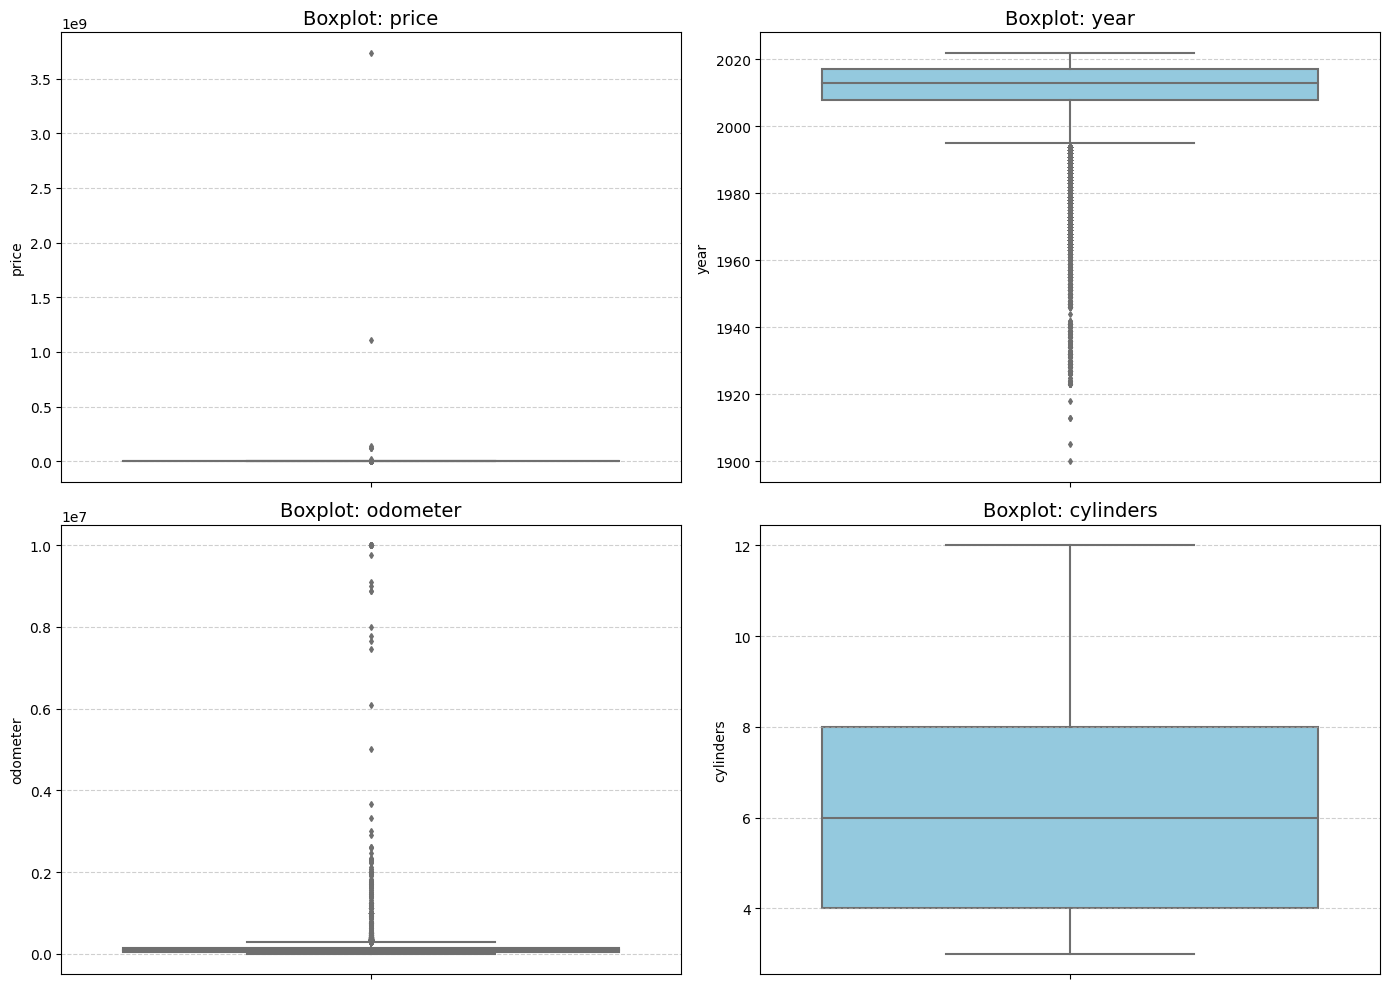

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'year', 'odometer', 'cylinders']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue', fliersize=3)
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Из boxplot видно:

- `price`: есть нулевые и миллиардные значения — явные выбросы. до 80к еще принять можно, такова действительная действительность((
- `year`: ограничемся 1980, до этого машины - уже врядли ли живы, сравнивать их цены и состояние нет смысла
- `odometer`: пробег свыше 300 тыс. миль — почти рекорд, после этого — выброс.
- `cylinders`: значения огонь, так и надо, все ок


In [13]:
df = df[
    (df['price'] > 500) & (df['price'] <= 80000) &
    (df['year'] >= 1980) & (df['year'] <= 2025) &
    (df['odometer'] >= 1000) & (df['odometer'] <= 300000)
].reset_index(drop=True)

print(f"Размер после удаления выбросов: {df.shape[0]} записей")

Размер после удаления выбросов: 173973 записей


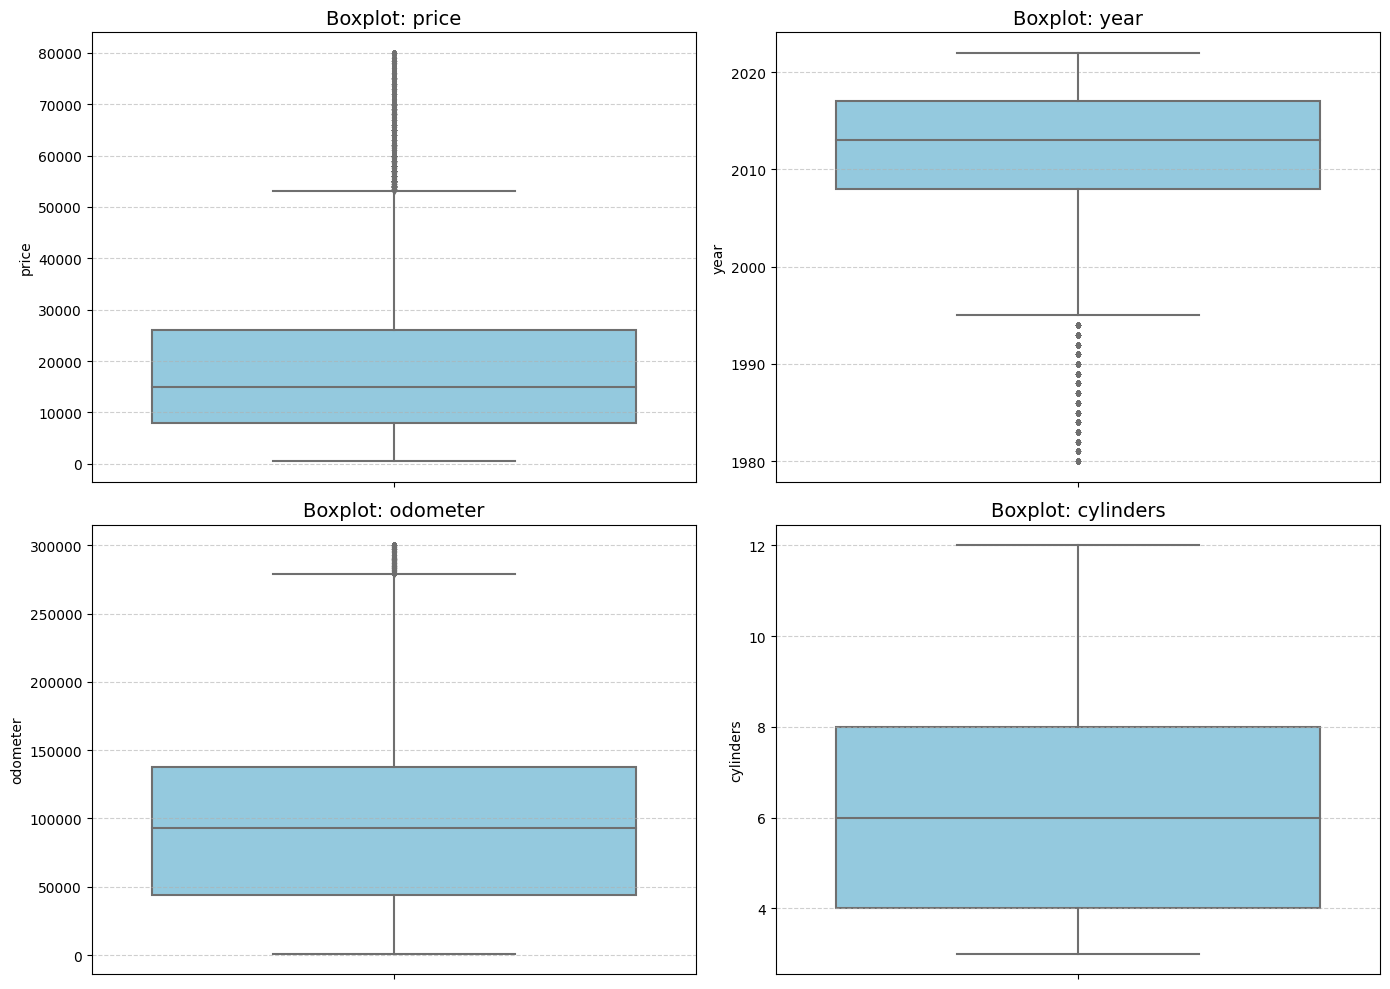

In [14]:
numeric_cols = ['price', 'year', 'odometer', 'cylinders']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue', fliersize=3)
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Визуализация
**корреляционная матрица** — она покажет, насколько сильно числовые признаки коррелируют друг с другом.

Числовые признаки: ['id', 'price', 'year', 'cylinders', 'odometer']


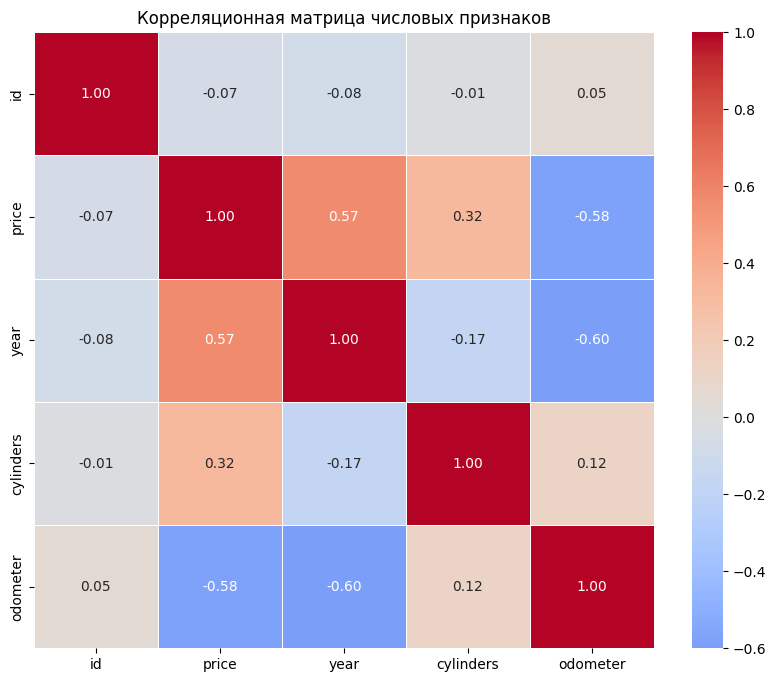

In [15]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Числовые признаки:", numeric_cols)

plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

Наблюдаем зависимость между признаками - что очевидно, чем машина старше и у нее больше пробег, тем она дешевле

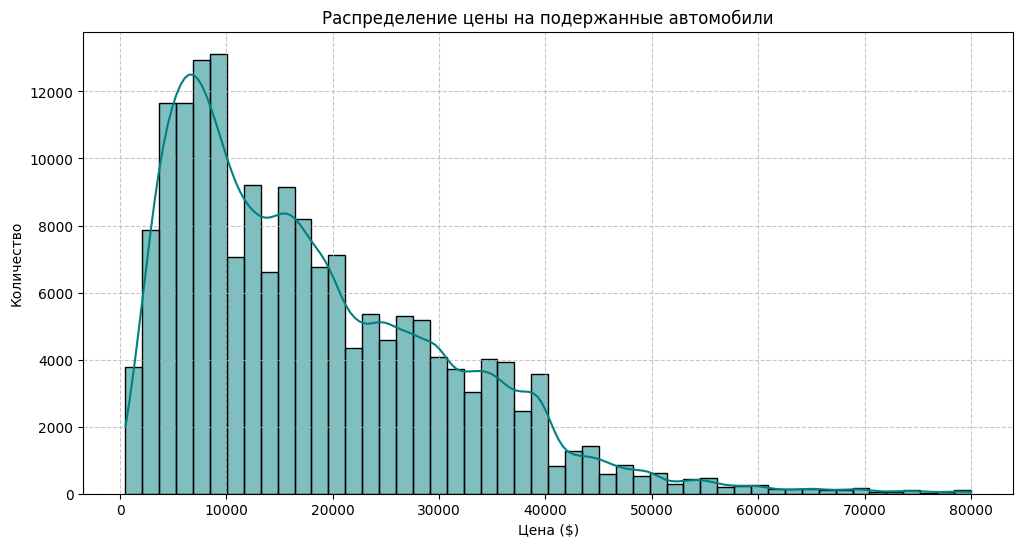

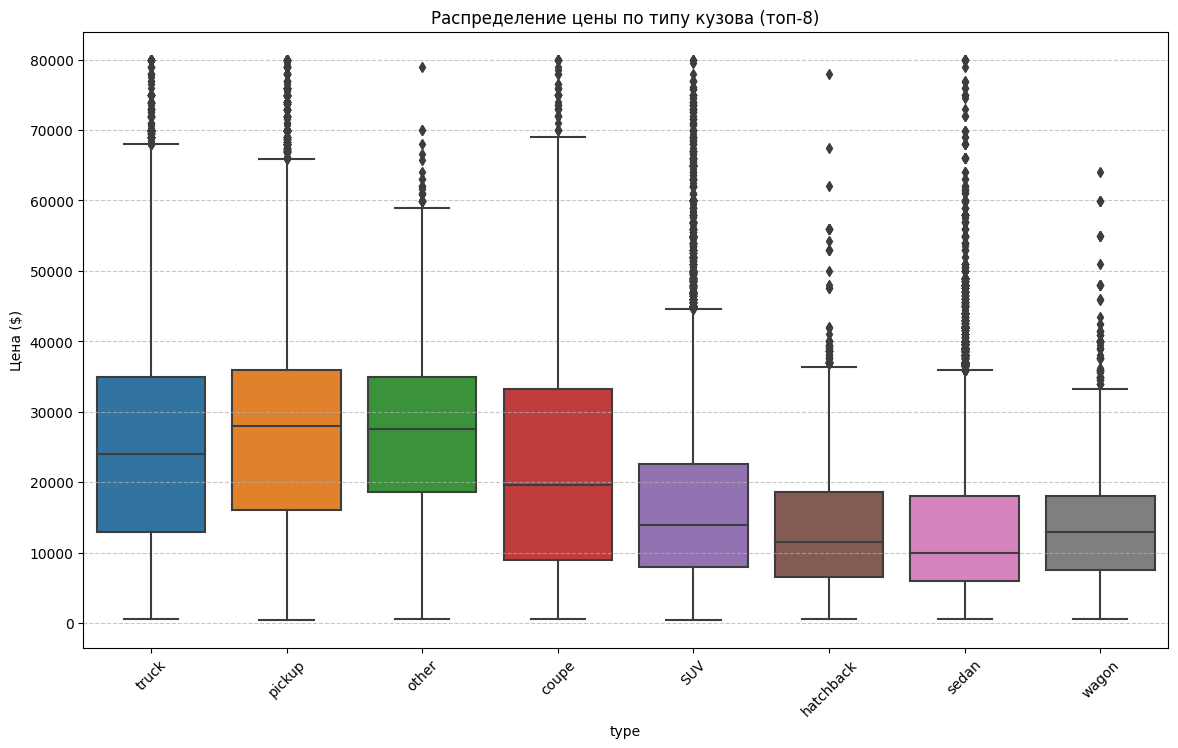

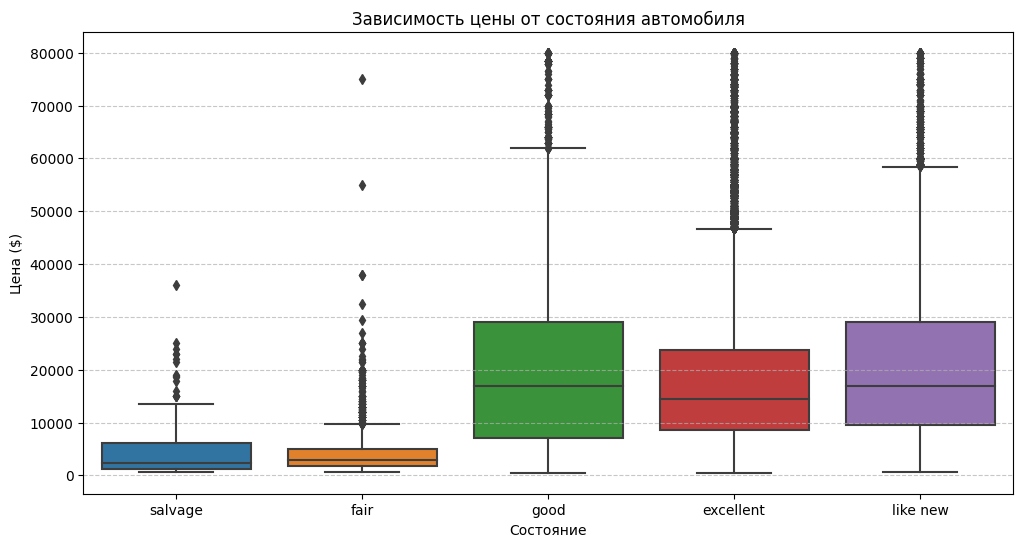

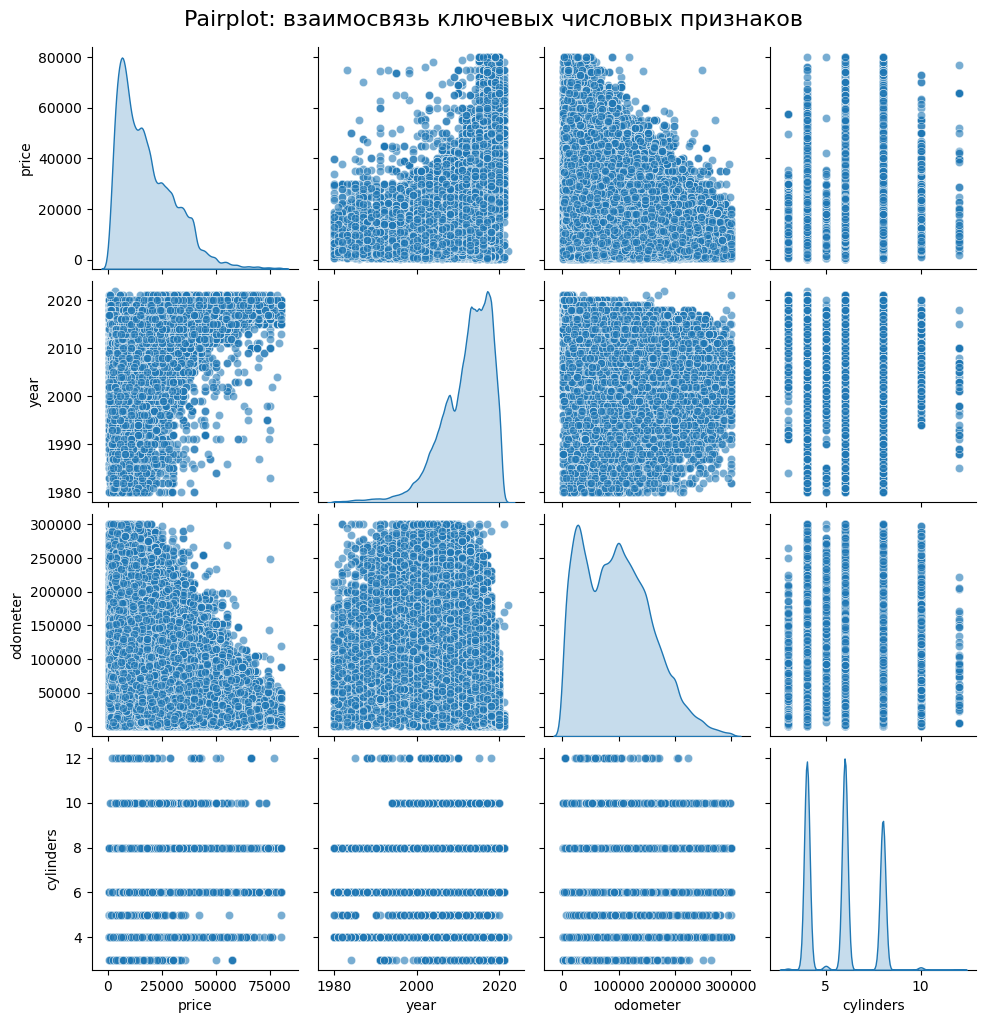

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Распределение цены
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Распределение цены на подержанные автомобили')
plt.xlabel('Цена ($)')
plt.ylabel('Количество')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Цена по типу кузова
plt.figure(figsize=(14, 8))
top_types = df['type'].value_counts().head(8).index
sns.boxplot(data=df[df['type'].isin(top_types)], x='type', y='price')
plt.title('Распределение цены по типу кузова (топ-8)')
plt.xticks(rotation=45)
plt.ylabel('Цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Цена по состоянию
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='price', order=['salvage', 'fair', 'good', 'excellent', 'like new'])
plt.title('Зависимость цены от состояния автомобиля')
plt.ylabel('Цена ($)')
plt.xlabel('Состояние')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pairplot для ключевых числовых признаков
sns.pairplot(df[['price', 'year', 'odometer', 'cylinders']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: взаимосвязь ключевых числовых признаков', y=1.02, fontsize=16)
plt.show()

Видим ожидаемые и понятные корреляции. 
- линейные зависимости: год растёт - цена растёт, пробег растёт - цена падает.
- группировки: мощные двигатели по цилиндрам

## Работа с качественными признаками

марка, состояние, тип кузова — всё это напрямую влияет на стоимость. Однако, в этих ячейках лежит текст, а модели не могут с ним работать, соответственно нужно их как-то закодировать:

- Если есть **естественный порядок** (например, "salvage" < "fair" < "excellent") — используем **Label Encoding**
- Если признак **номинальный**, но с небольшим количеством уникальных значений — **One-Hot Encoding**
- Если слишком много уникальных значений (например, `model` или `description`) — рискуем получить **очень широкий датасет** после OHE, поэтому такие признаки либо агрегируем, либо кодируем через **Frequency Encoding** или оставляем для более сложных методов (например, embeddings)

In [17]:
categorical_cols = ['manufacturer', 'model', 'condition', 'fuel', 
                    'transmission', 'drive', 'type', 'paint_color', 
                    'state', 'region', 'title_status', 'description']

print("Количество уникальных значений для категориальных признаков:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:<15}: {unique_count:>5}")

Количество уникальных значений для категориальных признаков:
manufacturer   :    41
model          : 11301
condition      :     6
fuel           :     5
transmission   :     3
drive          :     3
type           :    13
paint_color    :    12
state          :    51
region         :   403
title_status   :     6
description    : 153083


Для малоразмерных признаков, посмотрим, какие значения они хранят

In [18]:
selected_cols = ['condition', 'fuel', 'transmission', 'drive', 'title_status', 'type', 'paint_color']

for col in selected_cols:
    print(f"\n{col}: {df[col].unique()}")


condition: ['excellent' 'good' 'new' 'fair' 'like new' 'salvage']

fuel: ['gas' 'other' 'diesel' 'hybrid' 'electric']

transmission: ['automatic' 'other' 'manual']

drive: ['rwd' '4wd' 'fwd']

title_status: ['clean' 'rebuilt' nan 'salvage' 'missing' 'lien' 'parts only']

type: ['truck' 'pickup' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'convertible' 'wagon' 'van' 'bus']

paint_color: ['black' 'silver' 'grey' 'red' 'blue' 'white' 'brown' 'yellow' 'green'
 'custom' 'orange' 'purple']


Вот итог по уникальным значениям:

- `manufacturer`: 41 можно One-Hot или Frequency
- `model`: 11 301 слишком много и важный признак, юхаем Target Encoding
- `condition`: 6 идеально для Label Encoding (есть порядок)
- `fuel`, `transmission`, `drive`: 3–5 отлично подходят для One-Hot
- `type`, `paint_color`: 12–13 можно и One-Hot, но, чтобы не увеличивать слишком размерность - Frequency Encoding
- `state`: 51, `region`: 403 лучше Frequency Encoding
- `description`: 153083 уникальных нельзя кодировать напрямую, нужен NLP/Embeddings

Давайте обработаем каждый тип признаков отдельно.

#### Label (Ordinal) Encoding: 

У нас есть чёткая иерархия состояний:

для condition
`savlage` < `fair` < `good` < `excellent` < `like new` < `new`

для title_status
`parts only` < `salvage` < `rebuilt` < `missing` < `lien` < `clean`



In [19]:
condition_order = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
condition_map = {status: i for i, status in enumerate(condition_order)}
df['condition'] = df['condition'].map(condition_map)


title_status_order = ['clean', 'rebuilt', 'salvage', 'missing', 'lien', 'parts only']
title_status_map = {status: i for i, status in enumerate(title_status_order)}
df['title_status'] = df['title_status'].map(title_status_map)


#### One-Hot Encoding: малые категории

Для признаков с малым числом уникальных значений:
- `fuel`
- `transmission`
- `drive`

Применим One-Hot Encoding с `drop_first=True`, чтобы избежать мультиколлинеарности.

In [20]:
cols_to_ohe = ['fuel', 'transmission', 'drive']
df = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True)

#### Frequency Encoding: широкие категории

Для:
- `type`
- `paint_color`
- `state`
- `region`
  
заменим каждое значение на его частоту в датасете.

In [21]:
for col in ['state', 'region', 'type', 'paint_color']:
    freq_map = df[col].value_counts() / len(df)
    df[f'{col}_freq'] = df[col].map(freq_map)

df = df.drop(columns=['state', 'region', 'type', 'paint_color'])

### Target Encoding для `model` **и** `manufacturer` (с иерархическим блендингом)

Самая сложная категория — `model` (11 301 уникальное значение). One-Hot создаст >11 тыс. столбцов — слишком много.  
Решение: **Target Encoding** с бэкофом `model → manufacturer → глобальное среднее`.  
Дополнительно кодируем **`manufacturer`** отдельным TE (**только по цене**).

#### План:
1. Разделим данные на 5 фолдов.
2. Для каждого фолда:
   - На train части считаем:
     - Глобальное среднее цены: mu
     - Сглаженное среднее по `manufacturer` (**только по `price`**):  
       `mean_manuf = (sum_price + m_manuf * mu) / (count + m_manuf)`
     - Сглаженное среднее по `model` (с бэкофом на `mean_manuf`):  
       `mean_model = (sum_price + m_model * mean_manuf) / (count + m_model)`
   - Применим к val части:
     - Для `te_model_oof`:  
       если пара (`model`,`manufacturer`) встречалась - `mean_model`;  
       иначе - `mean_manuf` по марке;  
       иначе - mu.
     - Для `te_manufacturer_oof`:  
       если `manufacturer` встречался - `mean_manuf`;  
       иначе - mu.
3. Сохраним OOF-признаки `te_model_oof` и `te_manufacturer_oof`.
4. Обучим финальные карты на всём train для теста.

Параметры:
- `m_model = 500` (сильный бэкоф для редких моделей)
- `m_manuf = 100` (умеренный бэкоф для марок)

In [22]:
from sklearn.model_selection import KFold
import numpy as np

target = 'price'
feature = 'model'
m_model = 500
m_manuf = 100

# Добавим manufacturer для бэкофа
df['te_model_oof'] = np.nan
df['te_manufacturer_oof'] = np.nan  # OOF-TE для manufacturer
df['manufacturer'] = df['manufacturer'].values

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    train_data = df.iloc[train_idx]
    val_data = df.iloc[val_idx]
    
    # Глобальное среднее
    mu = train_data[target].mean()
    
    # Среднее по manufacturer (сглаженное)
    manuf_stats = train_data.groupby('manufacturer')[target].agg(['sum', 'count'])
    manuf_stats['mean_smooth'] = (manuf_stats['sum'] + m_manuf * mu) / (manuf_stats['count'] + m_manuf)
    
    # Среднее по model (сглаженное к manuf_mean)
    model_stats = train_data.groupby([feature, 'manufacturer'])[target].agg(['sum', 'count'])
    model_stats = model_stats.join(manuf_stats['mean_smooth'], on='manufacturer')
    model_stats['mean_smooth'] = (
        (model_stats['sum'] + m_model * model_stats['mean_smooth']) / 
        (model_stats['count'] + m_model)
    )
    
    for idx in val_idx:
        row = df.iloc[idx]
        model_val = row[feature]
        manuf_val = row['manufacturer']

        # TE по manufacturer (только по цене: сглаженное среднее -> мю)
        if manuf_val in manuf_stats.index:
            te_manuf = manuf_stats.loc[manuf_val, 'mean_smooth']
        else:
            te_manuf = mu
        df.loc[idx, 'te_manufacturer_oof'] = te_manuf  # записываем OOF

        # TE по model с бэкофом на manufacturer TE
        if (model_val, manuf_val) in model_stats.index:
            df.loc[idx, 'te_model_oof'] = model_stats.loc[(model_val, manuf_val), 'mean_smooth']
        else:
            df.loc[idx, 'te_model_oof'] = te_manuf  # бэкоф к manufacturer TE

# Удалим закодированные признаки:
df = df.drop(columns=['manufacturer', 'model'])

print(f"TE заполнено: model={df['te_model_oof'].notna().sum()} ", f"manufacturer={df['te_manufacturer_oof'].notna().sum()}")

TE заполнено: model=173973  manufacturer=173973


Посмотрим, что мы наделали:

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173973 entries, 0 to 173972
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   173973 non-null  int64         
 1   price                173973 non-null  int64         
 2   year                 173973 non-null  float64       
 3   condition            173973 non-null  int64         
 4   cylinders            173973 non-null  Int64         
 5   odometer             173973 non-null  float64       
 6   title_status         173566 non-null  float64       
 7   description          173972 non-null  object        
 8   posting_date         173973 non-null  datetime64[ns]
 9   fuel_electric        173973 non-null  bool          
 10  fuel_gas             173973 non-null  bool          
 11  fuel_hybrid          173973 non-null  bool          
 12  fuel_other           173973 non-null  bool          
 13  transmission_m

,id,price,year,condition,cylinders,odometer,title_status,description,posting_date,fuel_electric,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,state_freq,region_freq,type_freq,paint_color_freq,te_model_oof,te_manufacturer_oof
0,7316356412,15000,2013.0,3,6,128000.0,0.0,2013 F-150 XLT V6 4 Door. Good condition. Leve...,2021-05-03 19:02:03,False,...,False,False,False,True,0.012329,0.000328,0.105321,0.209170,20228.583361,20136.757536
1,7316343444,27990,2012.0,2,8,68696.0,0.0,Carvana is the safer way to buy a car During t...,2021-05-03 18:41:25,False,...,False,True,False,False,0.012329,0.000328,0.126077,0.209170,24936.745669,24228.390664
2,7316304717,34590,2016.0,2,6,29499.0,0.0,Carvana is the safer way to buy a car During t...,2021-05-03 17:41:33,False,...,False,True,False,False,0.012329,0.000328,0.126077,0.148408,25099.600519,19914.615212
3,7316285779,35000,2019.0,3,6,43000.0,0.0,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,2021-05-03 17:12:59,False,...,False,False,False,False,0.012329,0.000328,0.105321,0.095670,21119.239527,16356.129063
4,7316257769,29990,2016.0,2,6,17302.0,0.0,Carvana is the safer way to buy a car During t...,2021-05-03 16:31:14,False,...,False,True,False,False,0.012329,0.000328,0.126077,0.105005,22501.109375,20019.638000


Все получилось!

Теперь посмотрим, что получили для закодированных признаков

1) **Распределение `te_model_oof`** — ищем аномальные хвосты/шипы.  
2) **Калибровка `te_model_oof`**: средняя `price` по децилям TE — должна расти.  
3) **`te_model_oof` → `price` (scatter)** — ожидаем положительный тренд.  
4) **`te_model_oof` ↔ `te_manufacturer_oof` (scatter)** — проверяем, добавляет ли `model` информацию сверх `manufacturer`.  
5) **One-hot `fuel_*`: средняя цена по категориям** — sanity-check после OHE.

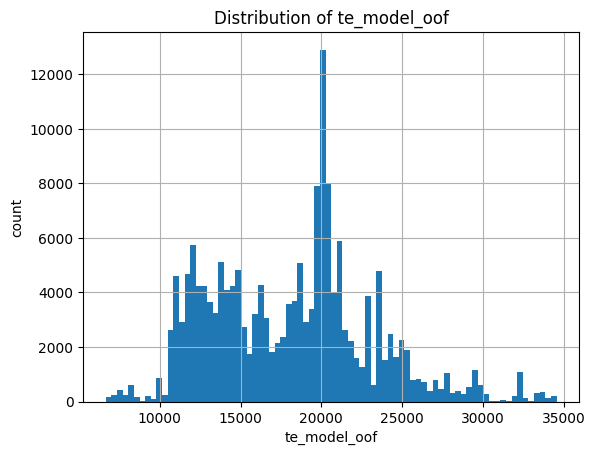

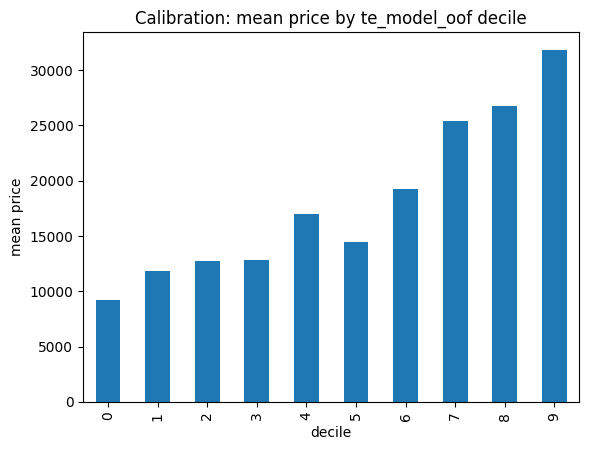

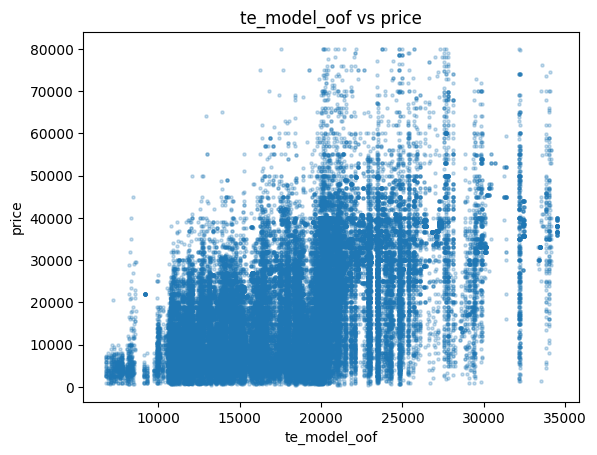

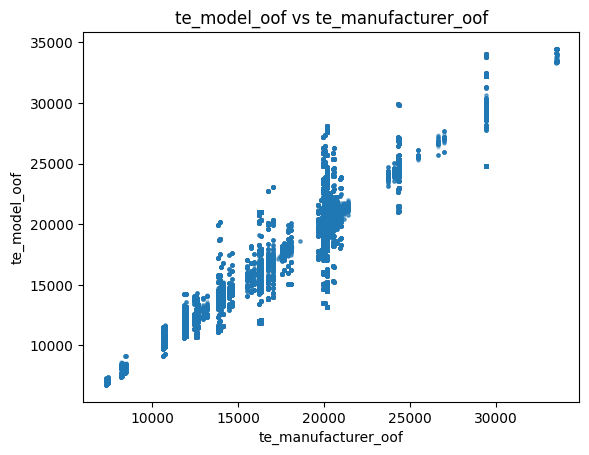

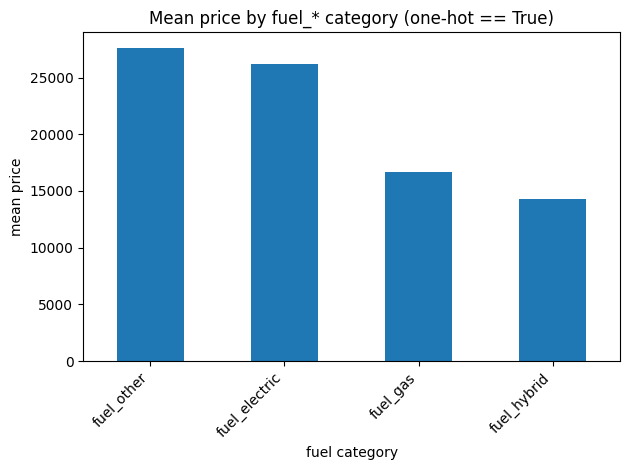

In [24]:
# 1) Распределение te_model_oof
if 'te_model_oof' in df.columns:
    df['te_model_oof'].hist(bins=80)
    plt.title('Distribution of te_model_oof')
    plt.xlabel('te_model_oof'); plt.ylabel('count')
    plt.show()

# 2) Калибровка te_model_oof по децилям
def plot_calibration(feature_col, target_col='price', nq=10):
    d = df[[feature_col, target_col]].dropna().copy()
    d['decile'] = pd.qcut(d[feature_col], nq, labels=False, duplicates='drop')
    d.groupby('decile')[target_col].mean().plot(kind='bar')
    plt.title(f'Calibration: mean {target_col} by {feature_col} decile')
    plt.xlabel('decile'); plt.ylabel(f'mean {target_col}')
    plt.show()

if 'te_model_oof' in df.columns:
    plot_calibration('te_model_oof', 'price')

# 3) te_model_oof vs price (sample для читабельности)
sample = df.sample(60000, random_state=42) if len(df) > 60000 else df
if {'te_model_oof','price'}.issubset(sample.columns):
    plt.scatter(sample['te_model_oof'], sample['price'], s=5, alpha=0.25)
    plt.title('te_model_oof vs price')
    plt.xlabel('te_model_oof'); plt.ylabel('price')
    plt.show()

# 4) te_model_oof vs te_manufacturer_oof
if {'te_model_oof','te_manufacturer_oof'}.issubset(sample.columns):
    plt.scatter(sample['te_manufacturer_oof'], sample['te_model_oof'], s=5, alpha=0.25)
    plt.title('te_model_oof vs te_manufacturer_oof')
    plt.xlabel('te_manufacturer_oof'); plt.ylabel('te_model_oof')
    plt.show()

# 5) One-hot fuel_*: средняя цена по категориям
fuel_cols = [c for c in df.columns if c.startswith('fuel_')]
if fuel_cols:
    means = {}
    for c in fuel_cols:
        mask = df[c] if df[c].dtype == bool else (df[c] == 1)
        m = df.loc[mask, 'price'].mean() if mask.any() else np.nan
        means[c] = m
    s = pd.Series(means).dropna().sort_values(ascending=False)
    s.plot(kind='bar')
    plt.title('Mean price by fuel_* category (one-hot == True)')
    plt.xlabel('fuel category'); plt.ylabel('mean price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Итого

- **TE калибровка — ок.** Средняя `price` монотонно растёт от нижних к верхним децилям `te_model_oof` (градиент ≈ 10k → 31k). Это главный сигнал, что TE настроен корректно и несёт предсказательную информацию.  
- **TE ↔ price — ожидаемый тренд.** На scatter’е виден положительный наклон: большие `te_model_oof` соответствуют более высоким ценам. Есть выраженная гетероскедастичность (разброс цены растёт с TE) и немного очень дешёвых точек — их стоит рассмотреть как потенциальные выбросы.  
- **model vs manufacturer.** Точки лежат близко к диагонали, но с заметным разбросом — значит, `te_model_oof` сильно коррелирует с `te_manufacturer_oof`, но добавляет **дополнительный** сигнал сверх марки (что и нужно). Для линейных моделей держим в уме коррелированность; для деревьев/бустинга это ок.  
- **Распределение TE.** `te_model_oof` мультимодален (выраженный «пик» около ~20k) — естественно для смеси сегментов (пикапы, седаны, т.д.) и не выглядит как артефакт.  
- **OHE по топливу — здравый смысл сходится.** `fuel_other` и `fuel_electric` дороже среднего, `fuel_gas`/`fuel_hybrid` — ниже. Разница есть, значит one-hot корректно отразил ценовые различия; интерпретацию делать с поправкой на размеры групп.

## Делим на train, test, val

- Целевой столбец: `price`  
- Доли: **70% / 15% / 15%**  
- Метод: случайное разбиение с **стратификацией по децилям `price`** (для стабильного распределения целевой).  
- Параметры: `shuffle=True`, `random_state=42`  
- Шаги:  
  1) Отделяем **test** = 15% от всего датасета с `stratify` по децилям `price`.  
  2) Из оставшихся 85% отделяем **valid** так, чтобы он был 15% от всего (т.е. `test_size=0.1765`), тоже со `stratify`.  
  3) Формируем `X_train, y_train, X_valid, y_valid, X_test, y_test`.


In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd

TARGET = 'price'

bins_full = pd.qcut(df[TARGET], q=10, labels=False, duplicates='drop')

# test
df_temp, df_test = train_test_split(
    df,
    test_size=0.15,
    shuffle=True,
    random_state=42,
    stratify=bins_full
)

# valid (15% от всего => 17.65% от оставшихся 85%)
bins_temp = pd.qcut(df_temp[TARGET], q=10, labels=False, duplicates='drop')
df_train, df_valid = train_test_split(
    df_temp,
    test_size=0.1765,
    shuffle=True,
    random_state=42,
    stratify=bins_temp
)


feature_cols = [c for c in df.columns if c != TARGET]
X_train = df_train[feature_cols].copy()
y_train = df_train[TARGET].copy()

X_valid = df_valid[feature_cols].copy()
y_valid = df_valid[TARGET].copy()

X_test  = df_test[feature_cols].copy()
y_test  = df_test[TARGET].copy()

In [26]:
import pandas as pd

n = len(df)
print({
    'train_rows': len(df_train),
    'valid_rows': len(df_valid),
    'test_rows' : len(df_test),
})
print({k: round(v / n, 3) for k, v in {
    'train': len(df_train),
    'valid': len(df_valid),
    'test' : len(df_test),
}.items()})

{'train_rows': 121776, 'valid_rows': 26101, 'test_rows': 26096}
{'train': 0.7, 'valid': 0.15, 'test': 0.15}


## Стандартизация данных

- Таргет: `price` — **не стандартизируем**.  
- Стандартизируем **только числовые признаки** (float/int)
- Масштабирование: `StandardScaler` (fit на **train**, transform на valid/test).
- Результат: `X_train_std`, `X_valid_std`, `X_test_std` — такие же DataFrame, но с scaled числовыми колонками.


In [27]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['number']).columns.difference(['id'])

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [28]:
# Стандартизированные данные уже записаны в X_train, X_valid, X_test

print("Стандартизированные данные тренировочной выборки:")
display(X_train.head())

print("\nСредние значения первых 5 признаков после стандартизации:")
print(X_train[num_cols].mean().head().values)

print("\nСтандартные отклонения первых 5 признаков после стандартизации:")
print(X_train[num_cols].std().head().values)


Стандартизированные данные тренировочной выборки:


,id,year,condition,cylinders,odometer,title_status,description,posting_date,fuel_electric,fuel_gas,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,state_freq,region_freq,type_freq,paint_color_freq,te_model_oof,te_manufacturer_oof
112263,7313436211,0.014513,0.516031,0.124952,-0.853102,-0.170712,This Jeep Wrangler can be yours today!If you h...,2021-04-27 18:06:46,False,True,...,True,False,False,False,0.404010,0.136545,0.720748,-1.905066,0.570440,0.552701
57889,7314652270,-0.147111,-0.980413,0.124952,-0.367541,-0.170712,Carvana is the safer way to buy a car During t...,2021-04-30 02:21:31,False,True,...,False,True,False,True,-0.531949,0.553098,-1.381719,-0.160016,0.372017,0.430481
121739,7316399129,-2.248225,0.516031,0.124952,0.684246,-0.170712,One owner. Garaged most of its life.,2021-05-03 20:11:53,False,True,...,False,False,True,False,0.161791,2.144926,1.083097,-0.770735,-2.117765,-2.334874
46159,7314712944,0.014513,0.516031,-1.127660,0.549997,-0.170712,Most common questions about this vehicle: Wan...,2021-04-30 10:28:02,False,True,...,False,False,True,False,1.030773,0.791128,1.083097,-0.902083,-1.378867,-0.986285
11840,7311344972,0.499386,-0.980413,1.377563,-1.245110,-0.170712,Carvana is the safer way to buy a car During t...,2021-04-23 15:00:51,False,True,...,False,True,False,True,2.352417,-1.761323,-1.184177,-0.160016,1.116454,0.467060



Средние значения первых 5 признаков после стандартизации:
[ 2.99910464e-17 -1.92082733e-16  3.15081032e-17  3.24416766e-17
  1.06952506e-16]

Стандартные отклонения первых 5 признаков после стандартизации:
[1.00000411 1.00000411 1.00000411 1.00000411 1.00000411]


#### Визуализация разбиения и стандартизации

Ниже представлены дополнительные графики и финальная сводка, подтверждающие корректность разбиения данных на train/valid/test и стандартизации числовых признаков.

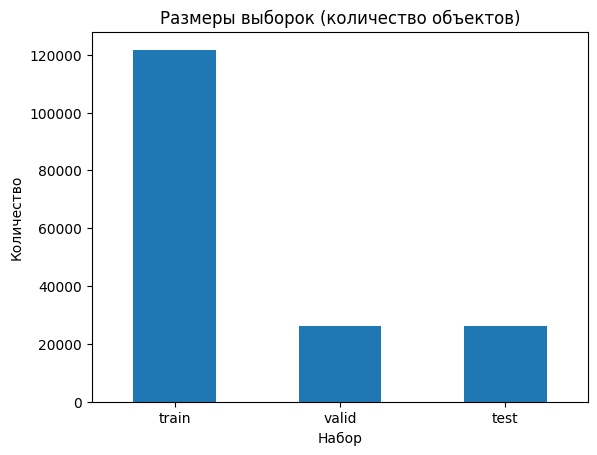

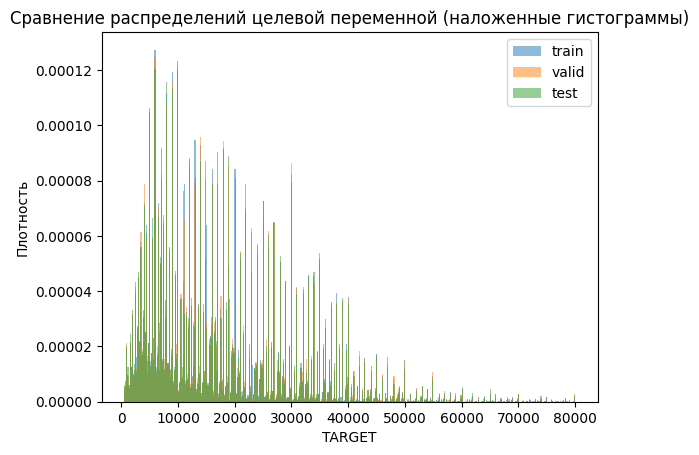

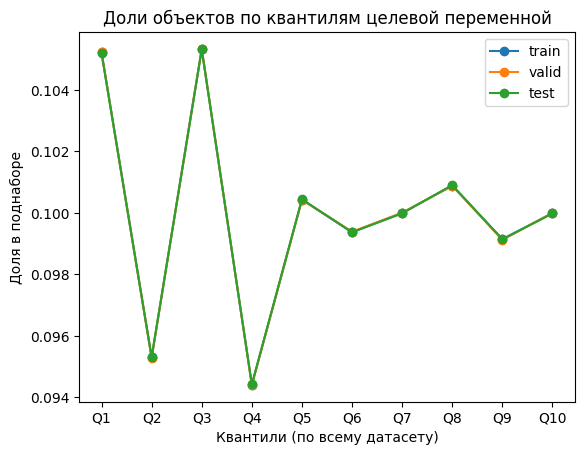

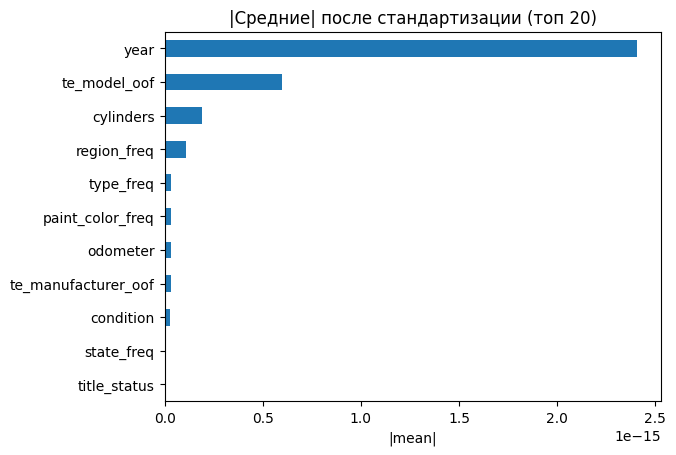

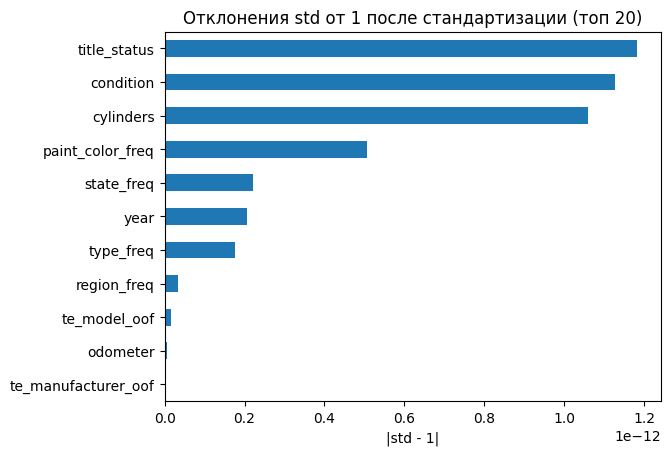

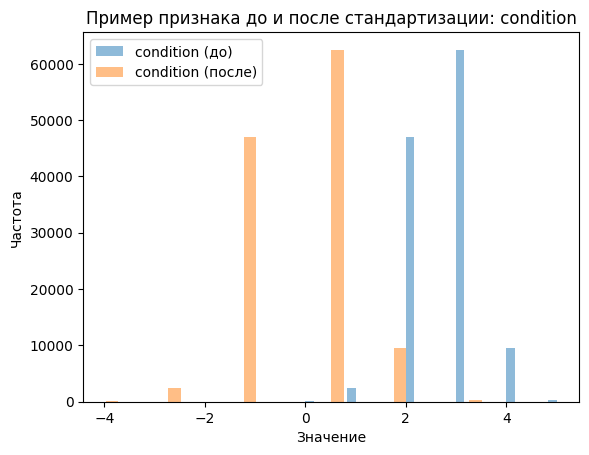

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sizes = pd.Series({
    'train': len(df_train),
    'valid': len(df_valid),
    'test':  len(df_test),
})
plt.figure()
sizes.plot(kind='bar', rot=0, title='Размеры выборок (количество объектов)')
plt.xlabel('Набор')
plt.ylabel('Количество')
plt.show()

plt.figure()
_bins = max(10, int(np.sqrt(len(y_train) + len(y_valid) + len(y_test))))
plt.hist(y_train, bins=_bins, alpha=0.5, label='train', density=True)
plt.hist(y_valid, bins=_bins, alpha=0.5, label='valid', density=True)
plt.hist(y_test,  bins=_bins, alpha=0.5, label='test',  density=True)
plt.title('Сравнение распределений целевой переменной (наложенные гистограммы)')
plt.xlabel('TARGET')
plt.ylabel('Плотность')
plt.legend()
plt.show()

y_all = pd.concat([y_train, y_valid, y_test], axis=0)
_, quantile_bins = pd.qcut(y_all, q=10, retbins=True, duplicates='drop')

def _bin_props(y):
    b = pd.cut(y, bins=quantile_bins, include_lowest=True)
    return b.value_counts(normalize=True, sort=False)

props_train = _bin_props(y_train)
props_valid = _bin_props(y_valid)
props_test  = _bin_props(y_test)

qidx = np.arange(len(props_train))
plt.figure()
plt.plot(qidx, props_train.values, marker='o', label='train')
plt.plot(qidx, props_valid.values, marker='o', label='valid')
plt.plot(qidx, props_test.values,  marker='o', label='test')
plt.xticks(qidx, [f'Q{i+1}' for i in qidx])
plt.title('Доли объектов по квантилям целевой переменной')
plt.xlabel('Квантили (по всему датасету)')
plt.ylabel('Доля в поднаборе')
plt.legend()
plt.show()

num_cols_list = list(num_cols)

means = X_train[num_cols_list].mean()
stds  = X_train[num_cols_list].std(ddof=0)

plt.figure()
means.abs().sort_values(ascending=False).head(20).iloc[::-1].plot(
    kind='barh', title='|Средние| после стандартизации (топ 20)')
plt.xlabel('|mean|')
plt.show()

plt.figure()
(stds - 1).abs().sort_values(ascending=False).head(20).iloc[::-1].plot(
    kind='barh', title='Отклонения std от 1 после стандартизации (топ 20)')
plt.xlabel('|std - 1|')
plt.show()

_col = num_cols_list[0]
_original_train_num = pd.DataFrame(
    scaler.inverse_transform(X_train[num_cols_list]),
    columns=num_cols_list,
    index=X_train.index
)
plt.figure()
plt.hist(_original_train_num[_col], bins=30, alpha=0.5, label=f'{_col} (до)')
plt.hist(X_train[_col],              bins=30, alpha=0.5, label=f'{_col} (после)')
plt.title(f'Пример признака до и после стандартизации: {_col}')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Главный вывод по проделанной работе

В ходе выполнения практической работы №1 был проведён полный цикл первичного анализа и предобработки данных на примере датасета подержанных автомобилей с Craigslist, содержащего более 400 тысяч записей.

На начальном этапе мы провели **первичное исследование данных**, выявили наличие пропусков, выбросов и неправильных типов данных. Особое внимание было уделено логической целостности, были преобразованы в корректные числовые и временные форматы, а бесполезные признаки удалены.

Одним из ключевых этапов стала **обработка пропусков**. Вместо простого удаления строк, мы применили **интеллектуальные методы восстановления**.

Были обработаны **выбросы** 

Качественные признаки были тщательно преобразованы:
- `condition` и `title_status` закодированы через **Label Encoding** с учётом порядка состояния;
- Признаки с малым числом категорий (`fuel`, `transmission`, `drive`) — через **One-Hot Encoding**;
- Высококардинальные признаки (`state`, `region`, `type`, `paint_color`) — через **Frequency Encoding**;
- Наиболее сложные (`model`, `manufacturer`) — через **Target Encoding с OOF и бэкофом**, что позволило использовать их ценовую информацию без взрывного роста размерности.

После этого выборка была разделена на **train / validation / test** в соотношении 70/15/15, а числовые признаки — стандартизированы с помощью `StandardScaler`.

Анализ корреляций показал **логичные зависимости**:
- Сильная положительная связь между `price` и `year` - новые авто дороже;
- Отрицательная корреляция `price` и `odometer` - больше пробег - ниже цена;
- Положительная связь `price` и `cylinders` - мощные двигатели увеличивают стоимость.

Все этапы сопровождались визуализацией: boxplot'ы для выбросов, гистограммы распределений, pairplot и heatmap корреляций — это позволило наглядно подтвердить все выводы.
